In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading the dataset from 3 different csv files.

In [2]:
#Loading the dataset
df_train = pd.read_csv(r"train_final.csv")
df_test = pd.read_csv(r"test_final.csv")
df_valid = pd.read_csv(r"valid_final.csv")

In [3]:
df_train.shape
# df_train.head()

(10236, 31)

In [4]:
df_test.shape
# df_train.head()

(1267, 30)

In [5]:
df_valid.shape
# df_valid.head()

(1283, 31)

## Merging all 3 dataset into 1.

In [6]:
df = pd.concat([df_train,df_test,df_valid])
df.reset_index(drop=True,inplace=True)
print(df.shape)
df.head()

(12786, 31)


,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0.0,2635.json,false,Says the Annies List political group supports ...,abortion,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1.0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2.0,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,3,3,3,3,3,3.0,1123.json,false,Health care reform legislation is likely to ma...,health-care,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,4,4,4,4,4,4.0,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


## Explaratory Data Analysis (EDA)

#### Exploring the division in the Target label.

In [7]:
# df.columns

for col in df.columns:
    print(col)

Unnamed: 0.2
Unnamed: 0
Unnamed: 0.1
Unnamed: 0.1.1
Unnamed: 0.1.1.1
Unnamed: 0.1.1.1.1
ID
label
statement
subject
speaker
speaker_job
state_info
party_affiliation
barely_true_counts
false_counts
half_true_counts
mostly_true_counts
pants_on_fire_counts
context
sentiment
sentiment_score
sentiment_magnitude
anger
fear
joy
disgust
sad
speaker_id
list
sentiment_code


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12786 entries, 0 to 12785
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.2          12786 non-null  int64  
 1   Unnamed: 0            12786 non-null  int64  
 2   Unnamed: 0.1          12786 non-null  int64  
 3   Unnamed: 0.1.1        12786 non-null  int64  
 4   Unnamed: 0.1.1.1      12786 non-null  int64  
 5   Unnamed: 0.1.1.1.1    11519 non-null  float64
 6   ID                    12786 non-null  object 
 7   label                 12786 non-null  object 
 8   statement             12786 non-null  object 
 9   subject               12786 non-null  object 
 10  speaker               12786 non-null  object 
 11  speaker_job           9223 non-null   object 
 12  state_info            10040 non-null  object 
 13  party_affiliation     12786 non-null  object 
 14  barely_true_counts    12786 non-null  float64
 15  false_counts       

C:\Users\vaibh\AppData\Local\Temp\ipykernel_23716\1322746137.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, dfi in enumerate(df.groupby(["label"])):


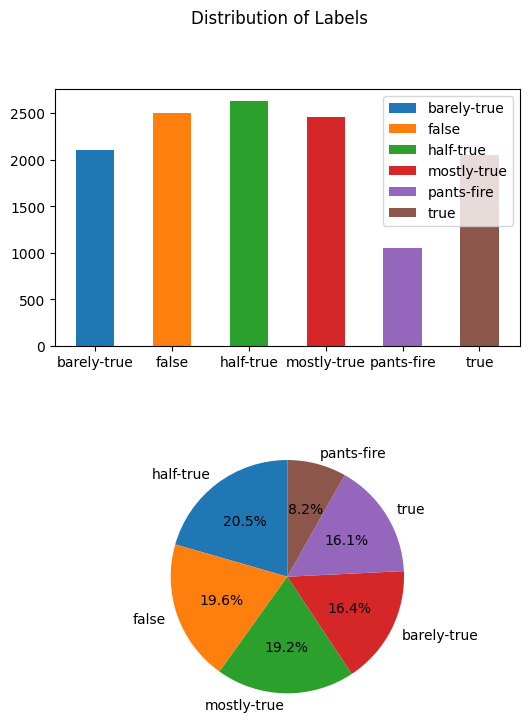

In [9]:
import matplotlib.pyplot as plt

# Create a grid of subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Bar plot
labels = []
for i, dfi in enumerate(df.groupby(["label"])):
    labels.append(dfi[0])
    ax1.bar(i, dfi[1].count(), width=0.5, label=dfi[0])  # Adjust the width of the bars as needed

ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels)
ax1.legend(loc='upper right')

# Pie plot
label_counts = df['label'].value_counts()
ax2.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures a circular pie

# Set spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# Set the overall title for the figure
fig.suptitle('Distribution of Labels')

plt.show()


#### Exploring the division in the Target label for Sentiment analysis.

C:\Users\vaibh\AppData\Local\Temp\ipykernel_23716\3615784437.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, dfi in enumerate(df.groupby(["sentiment"])):


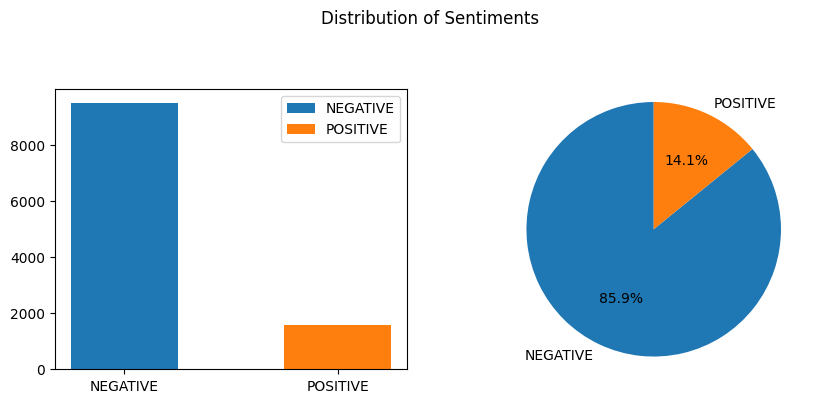

In [10]:
import matplotlib.pyplot as plt

# Create a grid of subplots
fig = plt.figure(figsize=(10, 8))

# Bar plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
labels = []
for i, dfi in enumerate(df.groupby(["sentiment"])):
    labels.append(dfi[0])
    ax1.bar(i, dfi[1].count(), width=0.5, label=dfi[0])

ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels)
ax1.legend(loc='upper right')

# Pie plot
ax2 = plt.subplot2grid((2, 2), (0, 1))
label_counts = df['sentiment'].value_counts()
ax2.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures a circular pie

# Set the overall title for the figure
fig.suptitle('Distribution of Sentiments')

plt.show()

## Pre-Processing

In [11]:
# dropping of unwanted columns
df = df.drop(['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'],axis=1)
df.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


In [12]:
df['full_text']=df['subject']+", "+df['statement']+", "+df['speaker_id']+", "+df['speaker_job']+", "+df['party_affiliation']+", "
+df['context']+", "+df['sentiment_code']

df['emotion']="["+df['anger'].astype(str)+","+df['disgust'].astype(str)+","\
+df['fear'].astype(str)+","+df['joy'].astype(str)+","+df['sad'].astype(str)+","+\
df["barely_true_counts"].astype(str) +","+ df["false_counts"].astype(str)  +","+\
df["half_true_counts"].astype(str) + ","+df["mostly_true_counts"].astype(str) +","+ \
df["pants_on_fire_counts"].astype(str)+","+df["sentiment_score"].astype(str)+"]"

In [13]:
df.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3563
state_info              2746
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  129
sentiment               1717
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1717
full_text               3563
emotion                    0
dtype: int64

In [14]:
df['full_text'] = df['full_text'].fillna('')
df['full_text'][1]

df.head(1)

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code,full_text,emotion
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_,"abortion, Says the Annies List political group...","[0.121137,0.263479,0.008926,0.026096,0.531887,..."


In [15]:
df.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3563
state_info              2746
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  129
sentiment               1717
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1717
full_text                  0
emotion                    0
dtype: int64

In [16]:
# Define the mapping dictionary
label_mapping = {
    'half-true': 'true',
    'mostly-true': 'true',
    'barely-true': 'false',
    'pants-fire': 'false'
}

# Apply the mapping to the 'label' column
df['label'] = df['label'].map(label_mapping)

In [17]:
unique_labels = df['label'].unique()
print(unique_labels)

[nan 'true' 'false']


In [18]:
df['digit'] = np.where(df['label'] == 'false', 0, np.where(df['label'] == 'true', 1, 2))

In [19]:
fake = 0
real = 0
null = 0
for i in df['digit']:
    if i == 0:
        fake = fake+1
    elif i == 1:
        real = real + 1
    else:
        null = null+1
print("Total number of rows in dataset: ", len(df))        
print("The total number of FAKE labelled news in our dataset is: ", fake)
print("The total number of REAL labelled news in our dataset is: ", real)
print("The total number of NULL labelled news in our dataset is: ", null)

Total number of rows in dataset:  12786
The total number of FAKE labelled news in our dataset is:  3149
The total number of REAL labelled news in our dataset is:  5080
The total number of NULL labelled news in our dataset is:  4557


In [20]:
# Count the number of null values in 'label' column
null_count = df['label'].isnull().sum()

# Calculate the number of fake and real values to assign to null values
fake_count = df['label'].value_counts()['false']
real_count = df['label'].value_counts()['true']

# Randomly assign 'true' or 'false' to null values
random_labels = np.random.choice(['true', 'false'], size=null_count, p=[real_count/(real_count+fake_count), fake_count/(real_count+fake_count)])

# Replace the null values with the randomly assigned labels
df.loc[df['label'].isnull(), 'label'] = random_labels

# Verify the updated distribution of labels
label_counts = df['label'].value_counts()
print("Updated label distribution:\n", label_counts)


Updated label distribution:
 true     7872
false    4914
Name: label, dtype: int64


In [21]:
df['digit'] = np.where(df['label'] == 'false', 0, np.where(df['label'] == 'true', 1, 2))

# Display the updated DataFrame
df.head(1)

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,fear,joy,disgust,sad,speaker_id,list,sentiment_code,full_text,emotion,digit
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_,"abortion, Says the Annies List political group...","[0.121137,0.263479,0.008926,0.026096,0.531887,...",0


In [22]:
unique_labels = df['label'].unique()
print(unique_labels)

['false' 'true']


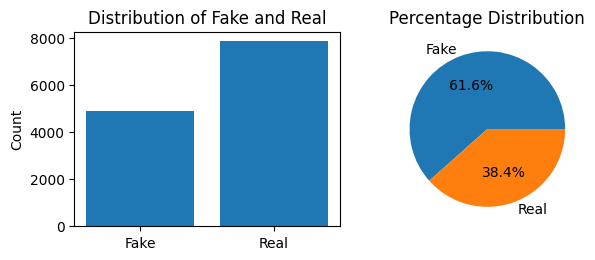

In [23]:
# Calculate the value counts
total_value = df['digit'].value_counts()

# Plot the bar graph
plt.subplot(2, 2, 1)
plt.title('Distribution of Fake and Real')
plt.bar(total_value.index, total_value.values)
plt.xticks([0, 1], ['Fake', 'Real'])
plt.ylabel('Count')

# Plot the pie chart
plt.subplot(2, 2, 2)
plt.title('Percentage Distribution')
plt.pie(total_value, labels=['Fake', 'Real'], autopct='%1.1f%%')

# Adjust the layout
plt.tight_layout()

# Display the graphs
plt.show()


In [24]:
print(df.shape)
df.isnull().sum()

(12786, 28)


ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3563
state_info              2746
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  129
sentiment               1717
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1717
full_text                  0
emotion                    0
digit                      0
dtype: int64

In [25]:
import re

def preprocess_text(text):
    # Removing special characters and symbols
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # Converting text to lowercase
    text = text.lower()
    
    # Removing extra whitespaces
    text = re.sub(r"\s+", " ", text)
    
    return text

# Create a new DataFrame with the processed columns
df = df.copy()
df[['full_text']] = df[['full_text']].applymap(preprocess_text)

df.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,fear,joy,disgust,sad,speaker_id,list,sentiment_code,full_text,emotion,digit
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_,abortion says the annies list political group ...,"[0.121137,0.263479,0.008926,0.026096,0.531887,...",0
1,10540.json,true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_,energy history job accomplishments when did th...,"[0.095352,0.016999,0.124566,0.191357,0.102045,...",1
2,324.json,true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_,foreign policy hillary clinton agrees with joh...,"[0.039559,0.454228,0.024162,0.500384,0.052453,...",1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_,,"[0.004804,0.022509,0.194674,0.375055,0.383403,...",0
4,9028.json,true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN,,"[0.044237,0.045672,0.215996,0.222402,0.274343,...",1


In [26]:
merged_df = df.copy()

merged_df.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3563
state_info              2746
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  129
sentiment               1717
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1717
full_text                  0
emotion                    0
digit                      0
dtype: int64

In [27]:
file_path = 'fake_news_merged_final.csv'
merged_df.to_csv(file_path, index=False)
print("DataFrame saved to CSV successfully!")

DataFrame saved to CSV successfully!


## Splitting the data in Training set & Test Set 

In [28]:
columns = [i for i in df.columns]

columns

['ID',
 'label',
 'statement',
 'subject',
 'speaker',
 'speaker_job',
 'state_info',
 'party_affiliation',
 'barely_true_counts',
 'false_counts',
 'half_true_counts',
 'mostly_true_counts',
 'pants_on_fire_counts',
 'context',
 'sentiment',
 'sentiment_score',
 'sentiment_magnitude',
 'anger',
 'fear',
 'joy',
 'disgust',
 'sad',
 'speaker_id',
 'list',
 'sentiment_code',
 'full_text',
 'emotion',
 'digit']

In [29]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(df['full_text'])
y = df['label']

# print(X_Train)
# print(X_Test)

In [30]:
# X = df[columns]
# y = df[['label']]

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

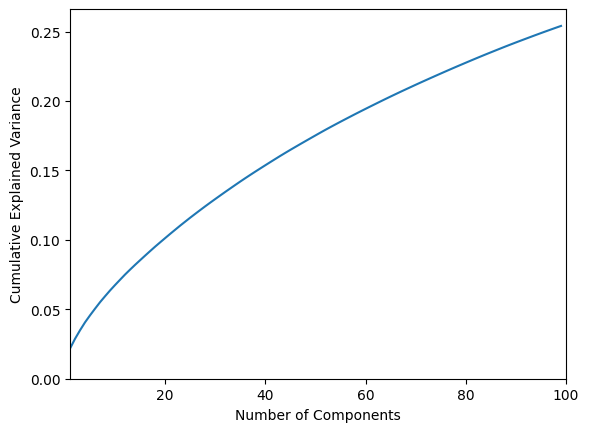

In [32]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Perform TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Specify the desired number of components
X_svd = svd.fit_transform(X)

# Plot explained variance ratio
explained_variance_ratio = np.cumsum(svd.explained_variance_ratio_)
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim([1, 100])
plt.show()


In [33]:
#Using Principal Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

In [34]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Create an instance of TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Specify the desired number of components

# Fit and transform the training data
X_train = svd.fit_transform(X_train)

# Transform the test data
X_test = svd.transform(X_test)

# Get the explained variance ratio
explained_variance = svd.explained_variance_ratio_

# Create a DataFrame to store the explained variance
pca_df = pd.DataFrame(explained_variance)


In [35]:
!pip install lazypredict



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:11<00:00,  4.54s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
QuadraticDiscriminantAnalysis      0.54               0.56    None      0.54   
NearestCentroid                    0.53               0.56    None      0.53   
GaussianNB                         0.54               0.54    None      0.54   
PassiveAggressiveClassifier        0.52               0.54    None      0.52   
BernoulliNB                        0.58               0.54    None      0.56   
LogisticRegression                 0.61               0.52    None      0.52   
RidgeClassifierCV                  0.61               0.52    None      0.51   
LinearDiscriminantAnalysis         0.61               0.52    None      0.52   
RidgeClassifier                    0.61               0.52    None      0.51   
LinearSVC                          0.61               0.52    None      0.52   
SVC                                0.61 

In [37]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.54,0.56,None,0.54,0.33
NearestCentroid,0.53,0.56,None,0.53,0.14
GaussianNB,0.54,0.54,None,0.54,0.16
PassiveAggressiveClassifier,0.52,0.54,None,0.52,0.18
BernoulliNB,0.58,0.54,None,0.56,0.19
LogisticRegression,0.61,0.52,None,0.52,0.17
RidgeClassifierCV,0.61,0.52,None,0.51,0.36
LinearDiscriminantAnalysis,0.61,0.52,None,0.52,0.43
RidgeClassifier,0.61,0.52,None,0.51,0.18


In [38]:
models.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, QuadraticDiscriminantAnalysis to LabelPropagation
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accuracy           26 non-null     float64
 1   Balanced Accuracy  26 non-null     float64
 2   ROC AUC            0 non-null      object 
 3   F1 Score           26 non-null     float64
 4   Time Taken         26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [39]:
sorted_models = models.sort_values(by='Accuracy', ascending=False)

In [40]:
sorted_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.61,0.52,None,0.50,16.87
CalibratedClassifierCV,0.61,0.51,None,0.49,18.76
RidgeClassifierCV,0.61,0.52,None,0.51,0.36
RidgeClassifier,0.61,0.52,None,0.51,0.18
LogisticRegression,0.61,0.52,None,0.52,0.17
LinearDiscriminantAnalysis,0.61,0.52,None,0.52,0.43
DummyClassifier,0.61,0.50,None,0.46,0.12
LinearSVC,0.61,0.52,None,0.52,5.05
ExtraTreesClassifier,0.61,0.50,None,0.48,3.69


In [41]:
models.shape

(26, 5)

In [42]:
# #Creating and train the Decision Tree model
# KNNModel = KNeighborsClassifier(n_neighbors=5)  
# KNNModel.fit(X_train, y_train)

In [43]:
# #Making predictions on the testing set
# Y_Pred = KNNModel.predict(X_test)

In [44]:
# from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# # Print classification report
# print("Classification Report:")
# report = classification_report(y_test, Y_Pred, target_names=['fake', 'real'])
# print(report)

# # Calculate and print accuracy
# accuracy = accuracy_score(y_test, Y_Pred)
# print("Accuracy: {:.2f}%".format(accuracy * 100))

# # Calculate precision, recall, and F1-score
# precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_Pred, average=None)

# # Print precision, recall, and F1-score in percentage
# print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
# print("Precision (Real): {:.2f}%".format(precision[1] * 100))
# print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
# print("Recall (Real): {:.2f}%".format(recall[1] * 100))
# print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
# print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))